To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 1 - Bias Variance Tradeoff

## 1.1

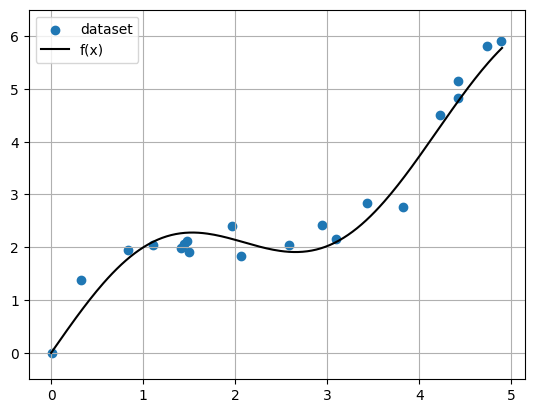

In [35]:
# your code starts here
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def f(x):
  return x + np.sin(x * 1.5)

def plot_smooth_curve(x, y, color = 'black', alpha = 1, label = 'f(x)'):
  x_new = np.linspace(x.min(), x.max(), 200)
  spl = make_interp_spline(x, y)
  y_smooth = spl(x_new)
  plt.plot(x_new, y_smooth, color = color, alpha = alpha, label = label)

random.seed(23)

x_start = 0
x_end = 5

x = random.uniform(x_start, x_end, 20)
y = f(x) + random.normal(0, 0.3, 20)
df = pd.DataFrame({'x': x, 'y': y})

plt.scatter(df['x'], df['y'], label = 'dataset')
# plt.show()

x_grid = np.arange(x_start, x_end, 0.1)
y_grid = f(x_grid)

plot_smooth_curve(x_grid, y_grid)

plt.legend(loc='upper left')
plt.ylim([-0.5, 6.5])
plt.grid(True)
plt.show()

 **Answer:**

## 1.2

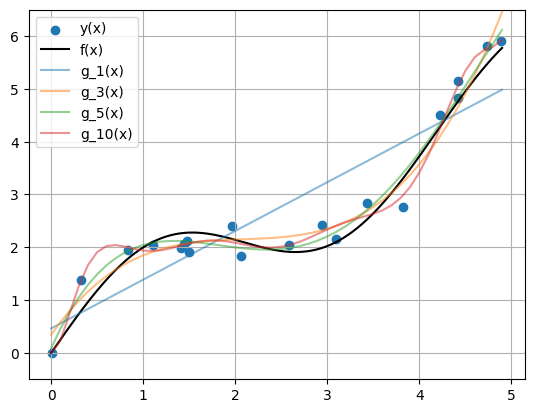

In [36]:
# your code starts here
plt.scatter(df['x'], df['y'], label = 'y(x)')

plot_smooth_curve(x_grid, y_grid)

poly_degs = [1, 3, 5, 10]
fits = {i: np.polyval(np.polyfit(df['x'], df['y'], i), x_grid) for i in poly_degs}

for deg in poly_degs:
  plt.plot(x_grid, fits[deg], alpha = 0.5, label = f'g_{deg}(x)')

plt.legend(loc='upper left')


plt.grid(True)
plt.ylim([-0.5, 6.5])

plt.show()

**Answer:**
$g_1$ is definitely underfitting. $g_{10}$ is definitely overfitting. $g_3$ and $g_5$ aren't clearly underfitting or overfitting and are very similar in shape.

## 1.3

### 1.3.(a)

Text(0.5, 1.0, 'Testing Error Relationship to Bias and Variance')

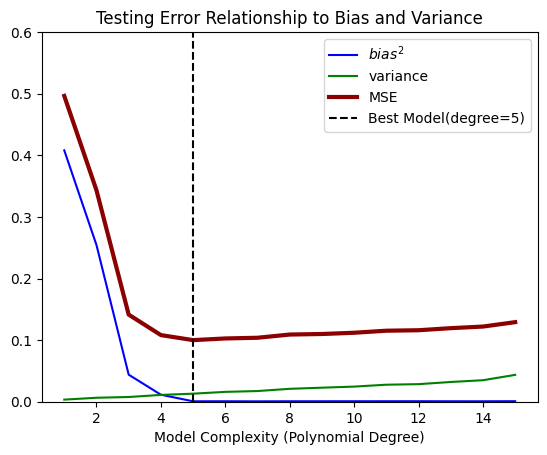

In [70]:
# your code starts here
from collections import defaultdict

np.random.seed(1776)
n_observations_per_dataset = 50
n_datasets = 100
max_poly_degree = 15  # Maximum model complexity
model_poly_degrees = range(1, max_poly_degree + 1)

percent_train = .8
n_train = int(np.ceil(n_observations_per_dataset * percent_train))

# Create training/testing inputs
x = random.uniform(x_start, x_end, n_observations_per_dataset)
x_train = x[:n_train]
x_test = x[n_train:]

def error_function(pred, actual):
  return (pred - actual) ** 2

# logging variables
theta_hat = defaultdict(list)

pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)

# Loop over datasets
for dataset in range(n_datasets):

    # Simulate training/testing targets
    y_train = f(x_train) + random.normal(0, 0.3, n_train)
    y_test = f(x_test) + random.normal(0, 0.3, n_observations_per_dataset - n_train)

    # Loop over model complexities
    for degree in model_poly_degrees:
        # Train model
        tmp_theta_hat = np.polyfit(x_train, y_train, degree)

        # Make predictions on train set
        tmp_pred_train = np.polyval(tmp_theta_hat, x_train)
        pred_train[degree].append(tmp_pred_train)

        # Test predictions
        tmp_pred_test = np.polyval(tmp_theta_hat, x_test)
        pred_test[degree].append(tmp_pred_test)

        # Mean Squared Error for train and test sets
        train_errors[degree].append(np.mean(error_function(tmp_pred_train, y_train)))
        test_errors[degree].append(np.mean(error_function(tmp_pred_test, y_test)))


def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - f(x_test)) ** 2)


def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (g(x) - E[g(x)])^2, averaged across all trials
    return np.mean((pred_test - average_model_prediction) ** 2)


complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in model_poly_degrees:
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]

## Plot Bias^2 + variance
plt.plot(model_poly_degrees, bias_squared, color='blue', label='$bias^2$')
plt.plot(model_poly_degrees, variance, color='green', label='variance')
plt.plot(model_poly_degrees, complexity_test_error, label='MSE', linewidth=3, color='darkred')
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylim([0, .6]);
plt.legend()
plt.title('Testing Error Relationship to Bias and Variance')

**Answer:**

### 1.3.(b)

In [79]:
# your code starts here
print(f'Best model degree: {best_model_degree}')
print('MSE: {}'.format(round(complexity_test_error[best_model_degree - 1], 4)))
print('Bias: {}'.format(round(bias_squared[best_model_degree - 1], 4)))
print('Variance: {}'.format(round(variance[best_model_degree - 1], 4)))

Best model degree: 5
MSE: 0.1
Bias: 0.0007
Variance: 0.0131


**Answer:**